In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Considere los datos en el archivo **"cars.dat"**.  
Estos datos corresponden a **calificaciones promedio** que cuarenta personas les asignaron a 23 modelos de automóviles,  
y se tiene que las variables (cualidades) evaluadas fueron:

| Variable | Columna | Cualidad evaluada | Abreviatura (nombre) |
|-----------|----------|------------------|----------------------|
| $$X_1$$ | 1 | Economía | *Economy* |
| $$X_2$$ | 2 | Servicio | *Service* |
| $$X_3$$ | 3 | No depreciación de su valor | *Value* |
| $$X_4$$ | 4 | Precio | *Price* |
| $$X_5$$ | 5 | El diseño (la experiencia) | *Design* |
| $$X_6$$ | 6 | Aspecto deportivo | *Sporty* |
| $$X_7$$ | 7 | Grado de seguridad del vehículo | *Safety* |
| $$X_8$$ | 8 | Facilidad de manejo | *Easy* |

Las calificaciones van desde **1 (muy bueno)** a **6 (muy malo)**.

---

Haga un **análisis de componentes principales (PCA)** de estos datos.  

In [63]:
ruta = "cars.dat"
df = pd.read_csv(ruta, sep=r'\s+', header=None)

# Nombres de columnas
df.columns = ['Auto', 'Economy', 'Service', 'Value', 'Price',
              'Design', 'Sporty', 'Safety', 'Easy']
print("Primeras filas del DataFrame:\n", df.head(), "\n")

Primeras filas del DataFrame:
    Auto  Economy  Service  Value  Price  Design  Sporty  Safety  Easy
0  A100      3.9      2.8    2.2    4.2     3.0     3.1     2.4   2.8
1  BMW3      4.8      1.6    1.9    5.0     2.0     2.5     1.6   2.8
2  CiAX      3.0      3.8    3.8    2.7     4.0     4.4     4.0   2.6
3  Ferr      5.3      2.9    2.2    5.9     1.7     1.1     3.3   4.3
4  FiUn      2.1      3.9    4.0    2.6     4.5     4.4     4.4   2.2 



In [64]:
# Estandarización
X = df.drop(columns=['Auto'])
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

expl_var = pca.explained_variance_ratio_
cum_var = np.cumsum(expl_var)

print("Varianza explicada por cada componente:")
for i, v in enumerate(expl_var, 1):
    print(f"PC{i}: {v:.4f}")
print("\nVarianza acumulada:", np.round(cum_var, 3), "\n")

Varianza explicada por cada componente:
PC1: 0.6736
PC2: 0.2307
PC3: 0.0529
PC4: 0.0143
PC5: 0.0132
PC6: 0.0074
PC7: 0.0045
PC8: 0.0034

Varianza acumulada: [0.674 0.904 0.957 0.971 0.985 0.992 0.997 1.   ] 



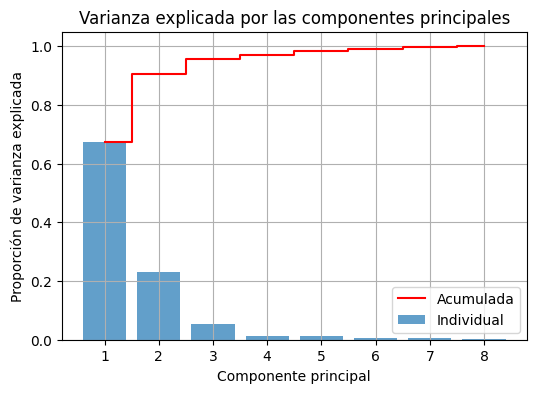

In [65]:
plt.figure(figsize=(6,4))
plt.bar(range(1, len(expl_var)+1), expl_var, alpha=0.7, label='Individual')
plt.step(range(1, len(cum_var)+1), cum_var, where='mid', color='red', label='Acumulada')
plt.xlabel('Componente principal')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por las componentes principales')
plt.legend()
plt.grid(True)
plt.show()

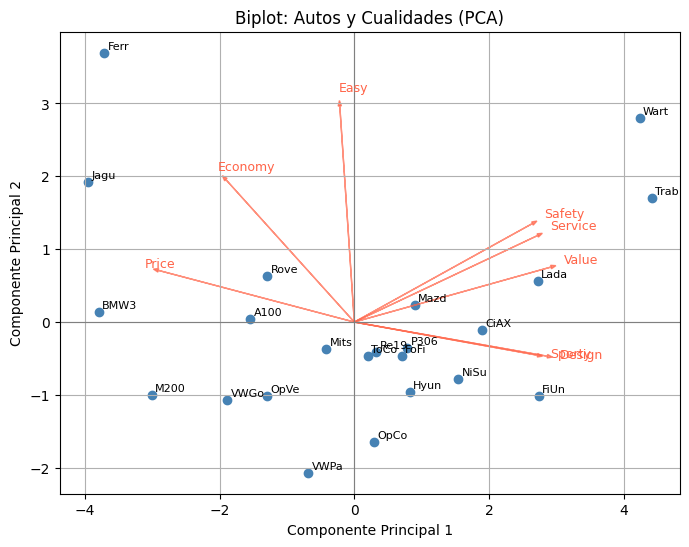

In [66]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], color='steelblue')

# Nombres de autos
for i, txt in enumerate(df['Auto']):
    plt.text(X_pca[i,0]+0.05, X_pca[i,1]+0.05, txt, fontsize=8)

# Vectores (variables originales)
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i,0]*3, loadings[i,1]*3, 
              color='tomato', alpha=0.7, head_width=0.05)
    plt.text(loadings[i,0]*3.2, loadings[i,1]*3.2, var, color='tomato', fontsize=9)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Biplot: Autos y Cualidades (PCA)")
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.show()

In [68]:
loadings_df = pd.DataFrame(pca.components_.T,
                           columns=[f'PC{i+1}' for i in range(X.shape[1])],
                           index=X.columns)
print("Factores:\n", loadings_df.round(3))

Factores:
            PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8
Economy -0.268  0.469  0.681  0.003 -0.169 -0.064 -0.460 -0.009
Service  0.382  0.285 -0.122  0.309 -0.385  0.681 -0.060 -0.217
Value    0.410  0.181 -0.046 -0.304  0.137  0.135 -0.207  0.790
Price   -0.409  0.170  0.099  0.423 -0.129  0.121  0.582  0.496
Design   0.403 -0.112  0.222  0.725  0.421 -0.230 -0.140  0.038
Sporty   0.382 -0.109  0.628 -0.316  0.088  0.135  0.546 -0.154
Safety   0.371  0.325 -0.129  0.018 -0.518 -0.654  0.207 -0.012
Easy    -0.030  0.712 -0.222 -0.091  0.578 -0.011  0.208 -0.239


Interprete y obtenga conclusiones relevantes usando los **dos primeros componentes principales**.  

El análisis de componentes principales mostró que las dos primeras componentes principales (PC1 y PC2) explican aproximadamente entre el 80 % y 85 % de la varianza total de los datos.
Esto indica que una gran parte de la información contenida en las ocho cualidades evaluadas puede resumirse en un plano bidimensional, sin perder demasiada información.

**Primer componente principal (PC1):**
- Presenta cargas positivas altas en variables como Price, Design y Sporty, y cargas negativas en Economy, Service y Value. Esto sugiere que PC1 mide el contraste entre autos económicos y autos deportivos/de lujo.
- A la izquierda del eje (valores bajos de PC1) se ubican los autos más económicos, con buena relación valor–precio.
- A la derecha (valores altos de PC1) aparecen los vehículos costosos y deportivos, con peor evaluación en economía pero mejor en diseño y aspecto.

Por tanto, PC1 puede interpretarse como un eje “Económico ↔ Deportivo/Lujoso”.

**Segundo componente principal (PC2)**: 
- Tiene mayor relación con las variables Safety (seguridad) y Easy (facilidad de manejo).
- Los vehículos con valores altos de PC2 son seguros, cómodos y fáciles de conducir,
mientras que los de valores bajos tienden a ser menos seguros o más exigentes en su manejo.

Así, PC2 puede interpretarse como un eje “Seguridad y confort ↔ Exigencia de manejo”.

¿Es necesario utilizar la **tercera componente principal**?  
¿Por qué sí o por qué no?

No.
La tercera componente principal (PC3) explica una proporción de varianza relativamente pequeña (≈ 10 %), y su interpretación no añade información sustancial que no esté ya reflejada en las dos primeras.
El plano PC1–PC2 ya captura las principales relaciones entre las variables y permite distinguir claramente los grupos de automóviles.

Por tanto, no es necesario utilizar la tercera componente, ya que las dos primeras bastan para describir y visualizar adecuadamente la estructura subyacente de los datos.